In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from pandas.tseries.offsets import QuarterEnd

C:\Users\Wonyoung\AppData\Local\Temp\ipykernel_1312\2310431563.py:87: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


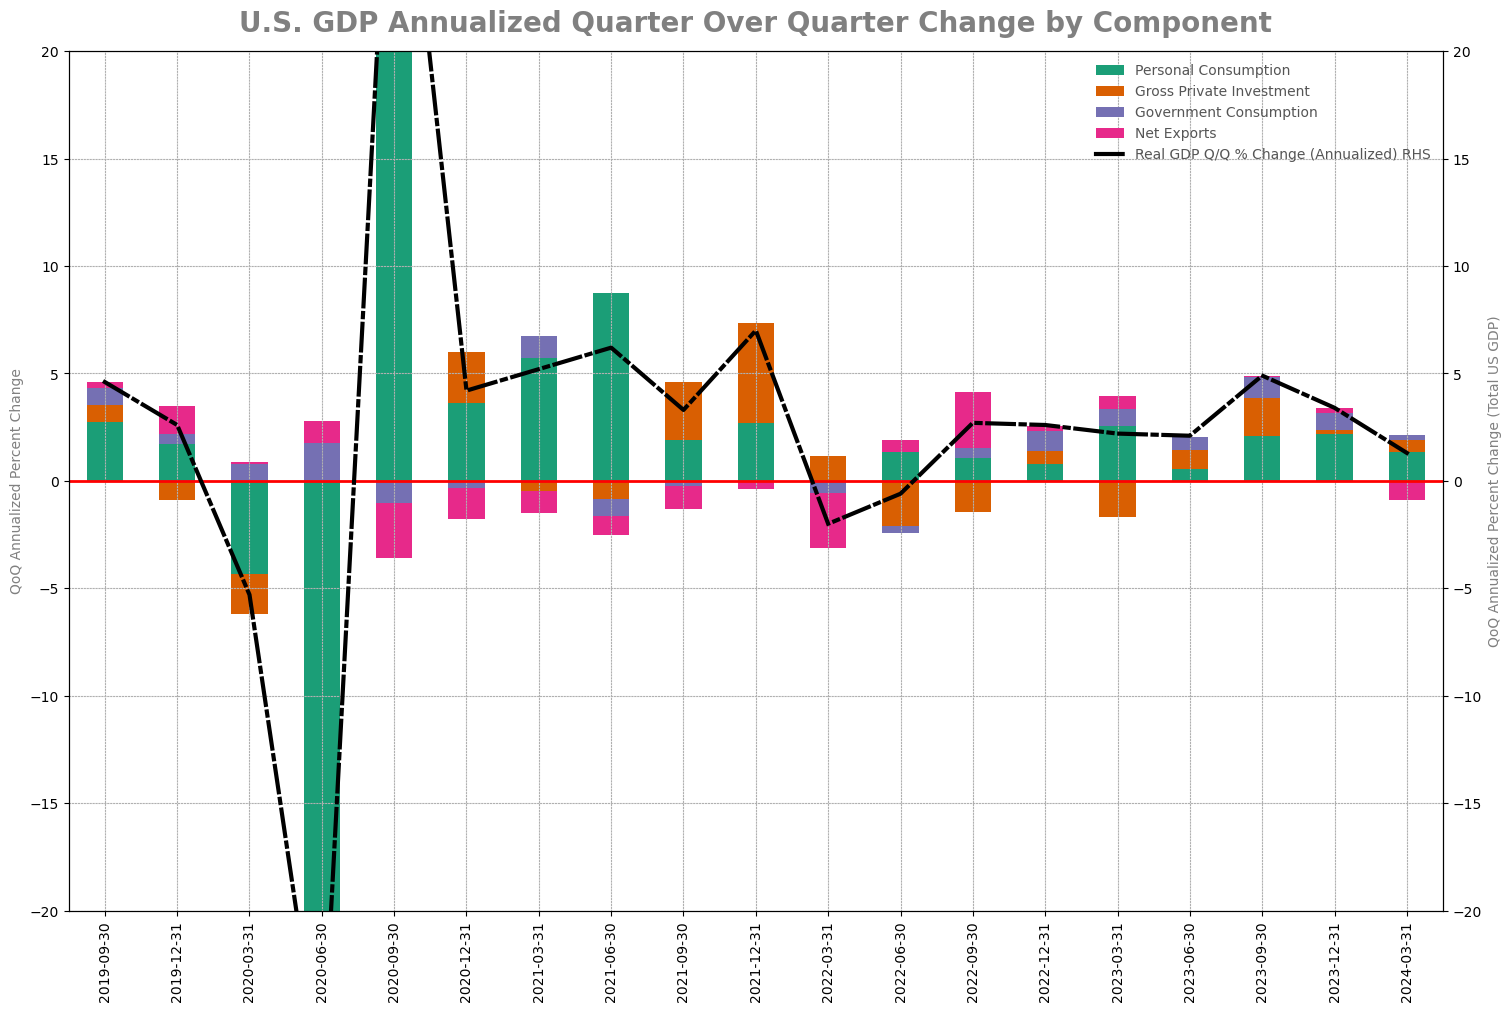

In [2]:
# first let's write a function to get the information from FRED using the pandas datareader
def get_econ_fred(fred_ids: list, start_date, end_date):
    """
    Retrieve economic series from FRED.

    Parameters:
        fred_ids (list): List of FRED IDs for the economic series.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
        pandas.DataFrame: A DataFrame containing the retrieved economic series data.
    """
    try:
        # Fetch data from FRED using pandas_datareader
        data = pdr.get_data_fred(fred_ids, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error fetching data: {str(e)}")
        return None

# now a function to do everythin we need!
def gdp_contributions(start_date, end_date):
    """
    Plots the contributions to U.S. GDP growth by component and the total GDP growth.

    This function fetches economic data for specified GDP components within a given date range,
    plots the contributions of each component as a stacked bar chart, and overlays the total GDP
    growth as a line plot on a secondary y-axis.

    Parameters:
    start_date (str): The start date for the data in 'YYYY-MM-DD' format.
    end_date (str): The end date for the data in 'YYYY-MM-DD' format.

    Returns:
    None: Displays the plot directly.
    """

    # Fetch economic data for the specified GDP components
    gdp_elems = [
        'DPCERY2Q224SBEA',  # Personal Consumption
        'A006RY2Q224SBEA',  # Gross Private Investment
        'A822RY2Q224SBEA',  # Government Consumption
        'A019RY2Q224SBEA',  # Net Exports
        'A191RL1Q225SBEA',  # Real GDP Q/Q % Change (Annualized)
    ]
    df_gdp = get_econ_fred(gdp_elems, start_date, end_date)
    df_gdp.index = pd.to_datetime(df_gdp.index) + QuarterEnd(n=1)  # adjust the index dates to align to quarter end
    df_gdp.index = df_gdp.index.date  # remove the timestamp from the index

    # Rename columns for readability
    cols = [
        'Personal Consumption',
        'Gross Private Investment',
        'Government Consumption',
        'Net Exports',
        'Real GDP Q/Q % Change (Annualized) RHS'
    ]
    df_gdp.columns = cols

    # Plot the first four components as a stacked bar chart
    ax = df_gdp.iloc[:, :-1].plot(kind='bar', stacked=True, figsize=(15, 10))
    plt.suptitle('U.S. GDP Annualized Quarter Over Quarter Change by Component')

    # Plot the last column (Real GDP) on a secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(ax.get_xticks(), df_gdp.iloc[:, -1], linewidth=3, color='black', label=df_gdp.columns[-1])

    # Set grid, labels, and horizontal line at y=0
    ax2.grid(False)
    ax.axhline(y=0, color='r', linestyle='-', linewidth=2)
    ax.set_ylabel('QoQ Annualized Percent Change')
    ax2.set_ylabel('QoQ Annualized Percent Change (Total US GDP)')

    # Adjust y-axis limits
    # we set this to 20, otherwise extreme periods like 2020 will warp all the
    # other periods
    y_min, y_max = -20, 20
    ax.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Update legend to include both axes
    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    legend = ax.legend(handles + handles2, labels + labels2, loc='best', frameon=False)

    plt.tight_layout()
    plt.show()

# now call the function
gdp_contributions('2019-06-10', '2024-06-09')